# Thông Tin Sinh Viên
1. Họ tên: Võ Khoa Nam
2. Mssv: 19521877
3. Lớp: CS116.M12.KHCL

# BÀI TẬP 1

# Cài đặt thư viện geopandas

In [4]:
pip install geopandas

     |████████████████████████████████| 994 kB 5.0 MB/s 
     |████████████████████████████████| 15.4 MB 38 kB/s 
     |████████████████████████████████| 6.3 MB 75.2 MB/s 


# Clone dữ liệu từ github 

In [1]:
!git clone https://github.com/Cityscope/CSL_HCMC

Cloning into 'CSL_HCMC'...
remote: Enumerating objects: 1930, done.
remote: Counting objects: 100% (590/590), done.
remote: Compressing objects: 100% (315/315), done.
remote: Total 1930 (delta 308), reused 500 (delta 269), pack-reused 1340
Receiving objects: 100% (1930/1930), 179.02 MiB | 25.03 MiB/s, done.
Resolving deltas: 100% (985/985), done.
Checking out files: 100% (542/542), done.


# Cài đặt một số thư viện

In [5]:
import geopandas
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt

# Đọc dữ liệu từ github

In [6]:
data = geopandas.read_file('/content/CSL_HCMC/Data/GIS/Population/population_HCMC/population_shapefile/Population_Ward_Level.shp')
data

,Com_Name,Dist_Name,Com_ID,Dist_ID,Level,Pop_2009,Pop_2019,Den_2009,Den_2019,Shape_Leng,Shape_Area,geometry
0,Tan Dinh,District 1,26734,760,Ward,26571.0,23258.0,41942.70,36713.10,3679.098196,6.334981e+05,"POLYGON ((684350.511 1193546.266, 684363.810 1..."
1,Ben Nghe,District 1,26740,760,Ward,13580.0,10633.0,5480.09,4290.86,6978.149149,2.478041e+06,"POLYGON ((686564.657 1193462.473, 686588.924 1..."
2,Cau Ong Lanh,District 1,26752,760,Ward,12917.0,10737.0,56878.90,47279.50,2260.705105,2.270938e+05,"POLYGON ((685922.373 1190479.807, 685914.160 1..."
3,Nguyen Thai Binh,District 1,26746,760,Ward,13197.0,9716.0,26798.80,19730.00,3320.174618,4.924426e+05,"POLYGON ((685966.333 1190513.667, 685944.353 1..."
4,Co Giang,District 1,26755,760,Ward,18967.0,11517.0,53327.60,32381.20,2525.453814,3.556650e+05,"POLYGON ((685514.573 1190211.431, 685547.521 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...
317,Tan Hung Thuan,District 12,26787,761,Ward,28892.0,33467.0,16053.40,18595.50,6271.308704,1.799659e+06,"POLYGON ((677816.513 1197206.772, 677796.932 1..."
318,Ward 17,Go Vap,26875,764,Ward,44226.0,54728.0,38061.20,47099.30,6385.950275,1.161947e+06,"POLYGON ((683516.949 1200006.226, 683509.721 1..."
319,Ward 8,Go Vap,26898,764,Ward,26545.0,32778.0,22751.50,28093.70,5409.821020,1.166701e+06,"POLYGON ((680928.492 1199066.285, 680984.889 1..."
320,Ward 9,Go Vap,26897,764,Ward,26785.0,34596.0,31843.10,41129.20,3950.799798,8.411288e+05,"POLYGON ((681120.443 1199640.183, 681120.846 1..."


# Phường có diện tích lớn nhất

## Tìm bằng hàm tự viết

In [19]:
Area = np.array(data['Shape_Area'])

In [22]:
def CalArea(Area):
  max_Area = Area[0]
  for i in range(len(Area)):
      if Area[i] >= max_Area:
        max_Area = Area[i]
  return max_Area

In [23]:
print(CalArea(Area))

161193856.431


## Tìm bằng cách sử dụng pandas

In [ ]:
data.loc[data['Shape_Area'].idxmax()]

Com_Name                                                Ly Nhon
Dist_Name                                               Can Gio
Com_ID                                                    27682
Dist_ID                                                     787
Level                                                   Commune
Pop_2009                                                   5696
Pop_2019                                                   5266
Den_2009                                                35.3378
Den_2019                                                32.6701
Shape_Leng                                              68958.5
Shape_Area                                          1.61194e+08
geometry      POLYGON ((703990.6024000002 1160907.838300001,...
Name: 204, dtype: object

In [ ]:
data[['Com_Name','Dist_Name','Shape_Area']][data.Shape_Area == data['Shape_Area'].max()]

,Com_Name,Dist_Name,Shape_Area
204,Ly Nhon,Can Gio,1.611939e+08


# Phường có dân số 2019 cao nhất

In [ ]:
data[['Com_Name','Dist_Name','Pop_2019']][data.Pop_2019 == data['Pop_2019'].max()]

,Com_Name,Dist_Name,Pop_2019
168,Vinh Loc A,Binh Chanh,124709.0


# Phường có diện tích nhỏ nhất

In [ ]:
data[['Com_Name','Dist_Name','Shape_Area']][data.Shape_Area == data['Shape_Area'].min()]

,Com_Name,Dist_Name,Shape_Area
71,Ward 3,District 10,101642.928821


# Phường có dân số thấp nhất 2019

In [ ]:
data[['Com_Name','Dist_Name','Pop_2019']][data.Pop_2019 == data['Pop_2019'].min()]

,Com_Name,Dist_Name,Pop_2019
218,An Khanh,District 2,223.0


# Phường nào có tốc độ tăng trưởng dân số nhanh nhất

In [14]:
data['Tocdo_tangtr'] = data['Pop_2019']/data['Pop_2009']

In [15]:
data[['Com_Name','Pop_2009','Pop_2019','Tocdo_tangtr']]

,Com_Name,Pop_2009,Pop_2019,Tocdo_tangtr
0,Tan Dinh,26571.0,23258.0,0.875315
1,Ben Nghe,13580.0,10633.0,0.782990
2,Cau Ong Lanh,12917.0,10737.0,0.831230
3,Nguyen Thai Binh,13197.0,9716.0,0.736228
4,Co Giang,18967.0,11517.0,0.607213
...,...,...,...,...
317,Tan Hung Thuan,28892.0,33467.0,1.158348
318,Ward 17,44226.0,54728.0,1.237462
319,Ward 8,26545.0,32778.0,1.234809
320,Ward 9,26785.0,34596.0,1.291618


In [17]:
data[['Com_Name','Dist_Name','Tocdo_tangtr']][data.Tocdo_tangtr == data['Tocdo_tangtr'].max()]

,Com_Name,Dist_Name,Tocdo_tangtr
211,Phu Huu,District 9,3.057949


# Phường có tốc độ tăng trưởng dân số thấp nhất

In [18]:
data[['Com_Name','Dist_Name','Tocdo_tangtr']][data.Tocdo_tangtr == data['Tocdo_tangtr'].min()]

,Com_Name,Dist_Name,Tocdo_tangtr
218,An Khanh,District 2,0.014241


# Phường có biến động dân số nhanh nhất

In [7]:
data['SubPop'] = data['Pop_2019'] - data['Pop_2009']

In [8]:
data[['Com_Name','Pop_2009','Pop_2019','SubPop']]

,Com_Name,Pop_2009,Pop_2019,SubPop
0,Tan Dinh,26571.0,23258.0,-3313.0
1,Ben Nghe,13580.0,10633.0,-2947.0
2,Cau Ong Lanh,12917.0,10737.0,-2180.0
3,Nguyen Thai Binh,13197.0,9716.0,-3481.0
4,Co Giang,18967.0,11517.0,-7450.0
...,...,...,...,...
317,Tan Hung Thuan,28892.0,33467.0,4575.0
318,Ward 17,44226.0,54728.0,10502.0
319,Ward 8,26545.0,32778.0,6233.0
320,Ward 9,26785.0,34596.0,7811.0


In [9]:
data[['Com_Name','Dist_Name','SubPop']][data.SubPop == data['SubPop'].max()]

,Com_Name,Dist_Name,SubPop
168,Vinh Loc A,Binh Chanh,74763.0


# Phường có biến động dân số thấp nhất

In [24]:
data[['Com_Name','Dist_Name','SubPop']][data.SubPop == data['SubPop'].min()]

,Com_Name,Dist_Name,SubPop
218,An Khanh,District 2,-15436.0


# Phường có mật độ dân số cao nhất 2019

In [10]:
data['Matdo_ds'] = data['Pop_2019']/data['Shape_Area']

In [11]:
data[['Com_Name','Dist_Name','Matdo_ds']]

,Com_Name,Dist_Name,Matdo_ds
0,Tan Dinh,District 1,0.036714
1,Ben Nghe,District 1,0.004291
2,Cau Ong Lanh,District 1,0.047280
3,Nguyen Thai Binh,District 1,0.019730
4,Co Giang,District 1,0.032382
...,...,...,...
317,Tan Hung Thuan,District 12,0.018596
318,Ward 17,Go Vap,0.047100
319,Ward 8,Go Vap,0.028095
320,Ward 9,Go Vap,0.041130


In [12]:
data[['Com_Name','Dist_Name','Matdo_ds']][data.Matdo_ds == data['Matdo_ds'].max()]

,Com_Name,Dist_Name,Matdo_ds
16,Ward 8,District 4,0.096193


# Phường có mật độ dân số thấp nhất 2019

In [13]:
data[['Com_Name','Dist_Name','Matdo_ds']][data.Matdo_ds == data['Matdo_ds'].min()]

,Com_Name,Dist_Name,Matdo_ds
204,Ly Nhon,Can Gio,0.000033


# Bài tập 2

# Cài đặt folium

In [ ]:
pip install folium

# Đọc file

In [ ]:
data1 = geopandas.read_file('/content/CSL_HCMC/Data/GIS/Population/population_HCMC/population_shapefile/Population_District_Level.shp')
data1

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,Pop_2016,Pop_2017,Pop_2019,Den_2009,Den_2010,Den_2011,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry
0,District 1,760,District,180225.0,187435.0,187419.0,190943.0,197421.0,200297.0,193632.0,208475.0,211220.0,142625.0,23360.4000,24294.9000,24292.9000,24749.600,25589.300,25962.100,25098.200,27022.100,27377.900,18486.8000,15274.835115,7.714899e+06,"POLYGON ((684948.318 1193882.223, 684971.256 1..."
1,District 3,770,District,190553.0,188945.0,190631.0,191580.0,193206.0,193694.0,196333.0,198104.0,199095.0,190375.0,38688.6000,38362.1000,38704.4000,38897.100,39227.200,39326.300,39862.100,40221.700,40422.900,38652.5000,12182.058264,4.925215e+06,"POLYGON ((684382.122 1193521.050, 684410.753 1..."
2,District 4,773,District,180980.0,183261.0,184711.0,185649.0,185808.0,187157.0,186727.0,186995.0,183894.0,175329.0,43311.1000,43857.0000,44204.0000,44428.400,44466.500,44789.300,44686.400,44750.600,44008.400,41958.7000,9483.716891,4.178668e+06,"POLYGON ((687625.438 1189132.516, 687615.280 1..."
3,District 6,775,District,249329.0,253474.0,254212.0,257865.0,266121.0,257183.0,258945.0,260742.0,262757.0,233561.0,34910.5000,35490.8000,35594.2000,36105.700,37261.600,36010.200,36256.900,36508.500,36790.600,32702.7000,13077.365262,7.140945e+06,"POLYGON ((679534.413 1187518.498, 679077.904 1..."
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,317488.0,327223.0,360155.0,6929.3900,7796.0600,7616.0700,7563.590,7963.850,8418.120,8798.840,9006.200,9282.350,10216.5000,33260.915360,3.525220e+07,"POLYGON ((691506.715 1190058.151, 691359.893 1..."
5,District 10,771,District,230345.0,232450.0,236336.0,237086.0,239180.0,238755.0,238558.0,239826.0,241327.0,234819.0,40354.6000,40723.4000,41404.2000,41535.600,41902.500,41828.000,41793.500,42015.600,42278.600,41138.5000,10478.512538,5.707881e+06,"POLYGON ((682507.505 1189929.778, 682485.431 1..."
6,District 11,772,District,226854.0,232536.0,236443.0,233499.0,227860.0,228030.0,230596.0,234291.0,237110.0,209867.0,44207.9000,45315.2000,46076.6000,45502.900,44404.000,44437.100,44937.200,45657.200,46206.600,40897.6000,10833.546511,5.131351e+06,"POLYGON ((681349.265 1190928.179, 681382.887 1..."
7,Phu Nhuan,768,District,174535.0,175175.0,177242.0,179917.0,180456.0,182821.0,182477.0,181780.0,183288.0,163961.0,35692.6000,35823.5000,36246.2000,36793.300,36903.500,37387.100,37316.800,37174.300,37482.600,33530.3000,12392.134315,4.889837e+06,"POLYGON ((682877.988 1195927.612, 682969.684 1..."
8,Tan Binh,766,District,421724.0,430436.0,434298.0,440351.0,443061.0,448989.0,455029.0,469526.0,470699.0,474792.0,18796.9000,19185.2000,19357.3000,19627.100,19747.900,20012.100,20281.400,20927.500,20979.800,21162.2000,23807.894025,2.243513e+07,"POLYGON ((680274.980 1198401.860, 680578.965 1..."
9,Binh Thanh,765,District,457362.0,470054.0,484135.0,484423.0,482833.0,485772.0,487985.0,489657.0,490618.0,499164.0,22005.5000,22616.2000,23293.7000,23307.600,23231.100,23372.500,23478.900,23559.400,23605.600,24016.8000,29544.712130,2.078389e+07,"POLYGON ((684986.154 1194412.964, 684987.226 1..."


# Vẽ ranh giới các quận lên bản đồ

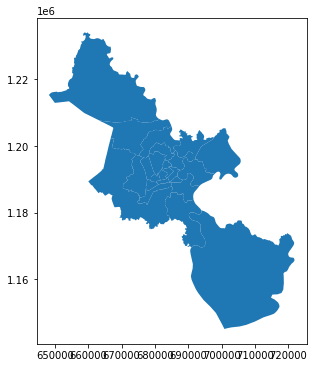

In [ ]:
data1.plot(figsize=(6, 6))
plt.show()

In [ ]:
data1 = data1.to_crs(epsg=4326)
print(data1.crs)
data1.head()

epsg:4326


,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,Pop_2016,Pop_2017,Pop_2019,Den_2009,Den_2010,Den_2011,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry
0,District 1,760,District,180225.0,187435.0,187419.0,190943.0,197421.0,200297.0,193632.0,208475.0,211220.0,142625.0,23360.40,24294.90,24292.90,24749.60,25589.30,25962.10,25098.20,27022.1,27377.90,18486.8,15274.835115,7.714899e+06,"POLYGON ((106.69160 10.79553, 106.69181 10.795..."
1,District 3,770,District,190553.0,188945.0,190631.0,191580.0,193206.0,193694.0,196333.0,198104.0,199095.0,190375.0,38688.60,38362.10,38704.40,38897.10,39227.20,39326.30,39862.10,40221.7,40422.90,38652.5,12182.058264,4.925215e+06,"POLYGON ((106.68641 10.79229, 106.68667 10.792..."
2,District 4,773,District,180980.0,183261.0,184711.0,185649.0,185808.0,187157.0,186727.0,186995.0,183894.0,175329.0,43311.10,43857.00,44204.00,44428.40,44466.50,44789.30,44686.40,44750.6,44008.40,41958.7,9483.716891,4.178668e+06,"POLYGON ((106.71584 10.75245, 106.71574 10.752..."
3,District 6,775,District,249329.0,253474.0,254212.0,257865.0,266121.0,257183.0,258945.0,260742.0,262757.0,233561.0,34910.50,35490.80,35594.20,36105.70,37261.60,36010.20,36256.90,36508.5,36790.60,32702.7,13077.365262,7.140945e+06,"POLYGON ((106.64179 10.73826, 106.63760 10.735..."
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,317488.0,327223.0,360155.0,6929.39,7796.06,7616.07,7563.59,7963.85,8418.12,8798.84,9006.2,9282.35,10216.5,33260.915360,3.525220e+07,"POLYGON ((106.75137 10.76062, 106.75001 10.758..."


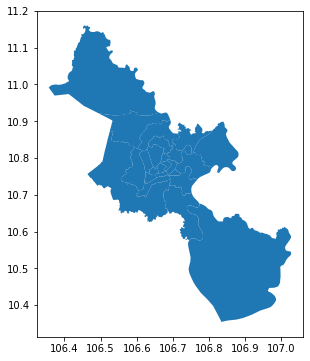

In [ ]:
data1.plot(figsize=(6, 6))
plt.show()

In [ ]:
m = folium.Map(location=[40.70, -73.94], zoom_start=10, tiles='CartoDB positron')
m

In [ ]:
for _, r in data1.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'green'})
    folium.Popup(r['Dist_Name']).add_to(geo_j)
    geo_j.add_to(m)
m

In [ ]:
# Project to NAD83 projected crs
data1 = data1.to_crs(epsg=2263)

# Access the centroid attribute of each polygon
data1['centroid'] = data1.centroid

In [ ]:
# geometry (active) column
data1 = data1.to_crs(epsg=4326)

# Centroid column
data1['centroid'] = data1['centroid'].to_crs(epsg=4326)

data1.head()

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,Pop_2016,Pop_2017,Pop_2019,Den_2009,Den_2010,Den_2011,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry,centroid
0,District 1,760,District,180225.0,187435.0,187419.0,190943.0,197421.0,200297.0,193632.0,208475.0,211220.0,142625.0,23360.40,24294.90,24292.90,24749.60,25589.30,25962.10,25098.20,27022.1,27377.90,18486.8,15274.835115,7.714899e+06,"POLYGON ((106.69160 10.79553, 106.69181 10.795...",POINT (106.69713 10.77622)
1,District 3,770,District,190553.0,188945.0,190631.0,191580.0,193206.0,193694.0,196333.0,198104.0,199095.0,190375.0,38688.60,38362.10,38704.40,38897.10,39227.20,39326.30,39862.10,40221.7,40422.90,38652.5,12182.058264,4.925215e+06,"POLYGON ((106.68641 10.79229, 106.68667 10.792...",POINT (106.68283 10.78144)
2,District 4,773,District,180980.0,183261.0,184711.0,185649.0,185808.0,187157.0,186727.0,186995.0,183894.0,175329.0,43311.10,43857.00,44204.00,44428.40,44466.50,44789.30,44686.40,44750.6,44008.40,41958.7,9483.716891,4.178668e+06,"POLYGON ((106.71584 10.75245, 106.71574 10.752...",POINT (106.70549 10.75845)
3,District 6,775,District,249329.0,253474.0,254212.0,257865.0,266121.0,257183.0,258945.0,260742.0,262757.0,233561.0,34910.50,35490.80,35594.20,36105.70,37261.60,36010.20,36256.90,36508.5,36790.60,32702.7,13077.365262,7.140945e+06,"POLYGON ((106.64179 10.73826, 106.63760 10.735...",POINT (106.63519 10.74585)
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,317488.0,327223.0,360155.0,6929.39,7796.06,7616.07,7563.59,7963.85,8418.12,8798.84,9006.2,9282.35,10216.5,33260.915360,3.525220e+07,"POLYGON ((106.75137 10.76062, 106.75001 10.758...",POINT (106.72941 10.73640)


In [ ]:
for _, r in data1.iterrows():
    lat = r['centroid'].y
    lon = r['centroid'].x
    folium.Marker(location=[lat, lon],
                  popup='length: {} <br> area: {}'.format(r['Shape_Leng'], r['Shape_Area'])).add_to(m)

In [ ]:
m

# References

1. https://geopandas.readthedocs.io/en/latest/gallery/polygon_plotting_with_folium.html
2. https://forum.machinelearningcoban.com/t/cach-su-dung-thu-vien-pandas-trong-python/2696